In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [201]:
data_asd = pd.read_csv("asd_screentime_lockdown.csv", sep=";")

In [208]:
# Quick analysis

# dimensions
print(f"Initial shape: {data_asd.shape}")
# Cleaning the names of columns for irregular ending spaces
clean_asd = data_asd.copy(deep=True)
clean_asd.columns = [col.replace(" ","") for col in clean_asd.columns]
# ID is irrelevant
clean_asd.drop("ID", axis=1, inplace=True)
clean_asd


Initial shape: (243, 18)


,mother/father,childage,childsex,ASDdiagnosis,languagecompetences,cognitivefunctioning,languageandcommunication,emotionalregulation,socialinteraction,stereotypes,behavioralproblems,restrictedinterests,autonomies,tv,video-games,playwithfrindsonline,socialnetworks
0,1,15,0,1,2,1,3.0,1.0,3.0,1.0,1.0,1.0,2.0,2,2,0.0,0
1,1,6,0,3,3,2,3.0,2.0,3.0,2.0,2.0,1.0,3.0,1,1,0.0,0
2,2,8,0,1,0,2,2.0,3.0,2.0,3.0,1.0,3.0,3.0,1,1,0.0,0
3,1,7,1,3,2,3,3.0,3.0,3.0,2.0,3.0,3.0,2.0,2,1,0.0,0
4,1,4,0,1,1,2,3.0,3.0,1.0,3.0,2.0,3.0,3.0,2,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,1,14,0,1,2,2,3.0,1.0,2.0,1.0,1.0,1.0,1.0,0,0,NaN,0
239,1,6,1,2,1,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0,0,NaN,0
240,1,7,0,2,2,2,3.0,3.0,2.0,1.0,1.0,1.0,1.0,2,1,0.0,1
241,1,3,0,3,1,2,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2,0.0,0


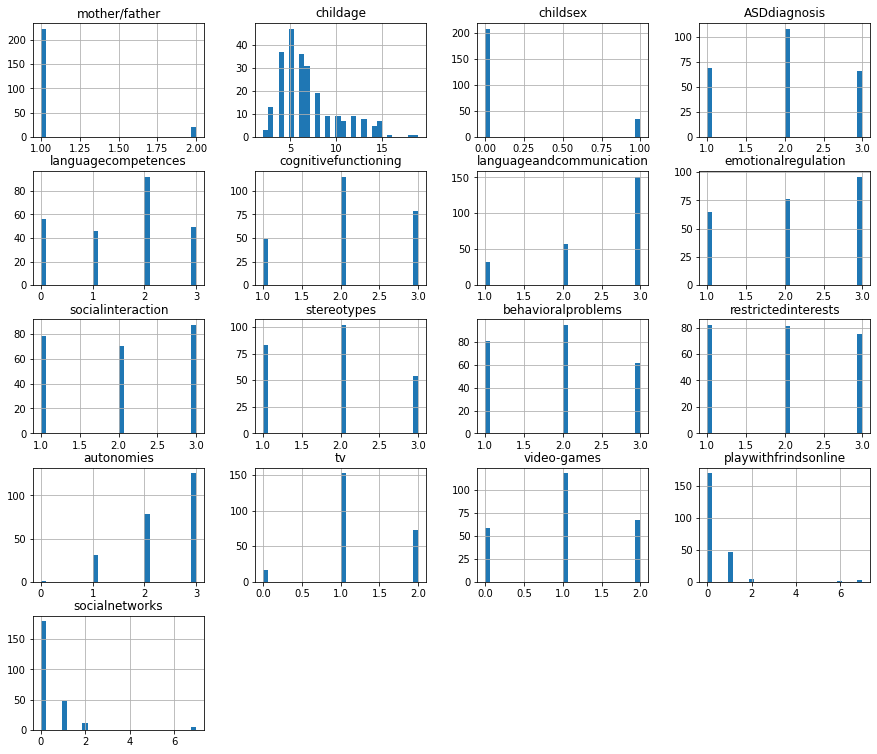

In [214]:
# We create histograms of all columns to check for outliers
clean_asd.hist(bins=30, figsize=(15, 13));

Shape after cleaning: (210, 17)
Number of NaNs: 3
Number of NaNs after replacement with median: 0


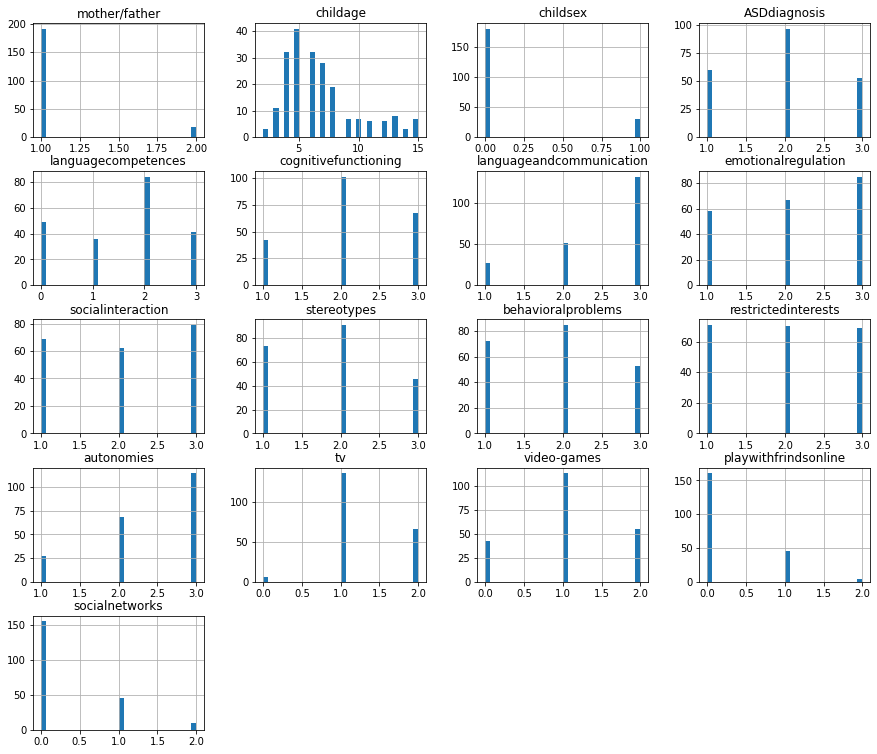

In [217]:
# filtering observations with errorneous data

# Ages above 15 should not exist
# attributes playwithfriendsonline and socialnetworks should not have values outside of 0,1,2
# attribute "autonomies" cant be outside 0,1,2
clean_asd2 = clean_asd[(clean_asd.childage <= 15) 
                        & (clean_asd.playwithfrindsonline <= 2) 
                        & (clean_asd.socialnetworks <= 2)
                        & (clean_asd.autonomies >= 1)]
asd_dims = clean_asd2.shape
print(f"Shape after cleaning: {asd_dims}")
# number of nans
print(f"Number of NaNs: {clean_asd2.isna().sum().sum()}")
# Fill NaNs with rounded median
asd = clean_asd2.fillna(clean_asd2.median(), inplace=False)
print(f"Number of NaNs after replacement with median: {asd.isna().sum().sum()}")
# convert all to integer
asd = asd.astype(int)
asd.hist(bins=30, figsize=(15,13));
# asd

In [218]:
# Refactor attributes from 1,2,3 to -1,0,1

# minus 2 to get 1, 0 and -1. Flip the signs to get "3=worsened" to be "-1=worsened"

if 3 == asd.languageandcommunication.iloc[0]:
    asd.loc[:,"languageandcommunication":"autonomies"] = (asd.loc[:,"languageandcommunication":"autonomies"]-2)*-1
asd

,mother/father,childage,childsex,ASDdiagnosis,languagecompetences,cognitivefunctioning,languageandcommunication,emotionalregulation,socialinteraction,stereotypes,behavioralproblems,restrictedinterests,autonomies,tv,video-games,playwithfrindsonline,socialnetworks
0,1,15,0,1,2,1,-1,1,-1,1,1,1,0,2,2,0,0
1,1,6,0,3,3,2,-1,0,-1,0,0,1,-1,1,1,0,0
2,2,8,0,1,0,2,0,-1,0,-1,1,-1,-1,1,1,0,0
3,1,7,1,3,2,3,-1,-1,-1,0,-1,-1,0,2,1,0,0
4,1,4,0,1,1,2,-1,-1,1,-1,0,-1,-1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1,6,0,1,3,3,1,0,1,1,0,1,-1,1,1,0,0
237,1,10,0,2,3,3,0,1,1,1,1,1,0,2,1,1,0
240,1,7,0,2,2,2,-1,-1,0,1,1,1,1,2,1,0,1
241,1,3,0,3,1,2,-1,0,0,0,0,0,0,1,2,0,0


<BarContainer object of 210 artists>

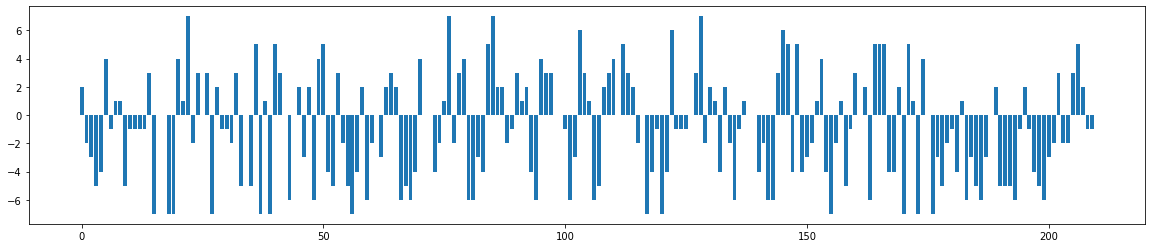

In [230]:
# Computing the aggregate scoring for average sum of behavioural change.

# plt.hist(asd.loc[:,"languageandcommunication":"autonomies"].sum(axis=1),bins=15)
# plt.xticks(np.arange(-7,7+1))
sum_behaviour_change = asd.loc[:,"languageandcommunication":"autonomies"].sum(axis=1)
fig = plt.figure(figsize=(20,4))
plt.bar(np.arange(asd_dims[0]), sum_behaviour_change)


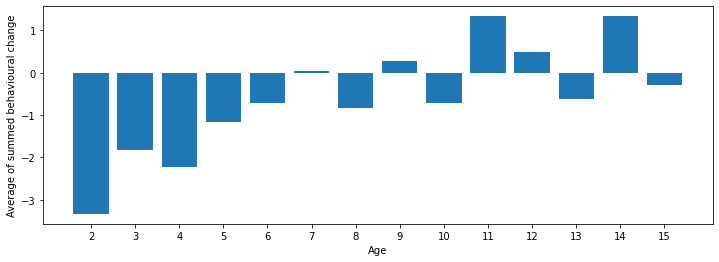

In [226]:
# Adding the sum of behaviour change to the CSV
if "sum_behaviour_change" not in asd.columns: asd["sum_behaviour_change"] = sum_behaviour_change
# SBC = sum behaviour change
SBC_age = asd.groupby("childage", as_index=False)["sum_behaviour_change"].mean()["sum_behaviour_change"]
SBC_age
fig = plt.figure(figsize=(12,4))
plt.bar(np.arange(SBC_age.shape[0])+2, SBC_age)
plt.xlabel("Age")
plt.ylabel("Average of summed behavioural change")
plt.xticks(np.arange(SBC_age.shape[0])+2);
# We cannot add the mean of each age to the csv, but that can be taken care of in Tableau
# Otherwise it can be a separate datase

In [293]:
# save the age-gender sum behaviour csv
# we create this to make a differentiated plot between the avg sum of behaviour change for both genders
SBC_age_gender = asd.groupby(["childage", "childsex"], as_index=False)["sum_behaviour_change"].mean()
SBC_age_gender.to_csv("SBC_age_gender2.csv", encoding="utf-8")

In [222]:
# Saving as new cleaned csv
asd.to_csv("clean_asd_screentime_lockdown.csv")

In [310]:
# General statistics

# % of children experiencing net sum negative behaviour change
print(f"% of children with net negative SBC: {sum(asd.sum_behaviour_change < 0)/asd.shape[0]*100}")
# average SBC for each gender, showing a large difference. furthermore the percentual increase girls have over boys.
SBC_gender = asd.groupby("childsex", as_index=False)["sum_behaviour_change"].mean().sum_behaviour_change
print(f"Girls have on average {abs((SBC_gender[1]-SBC_gender[0])/SBC_gender[0])*100}% more negative behaviour change than boys.")

% of children with net negative SBC: 53.333333333333336
Girls have on average 173.6% more negative behaviour change than boys.
